install the latest version of the package

In [1]:
install.packages("remotes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
remotes::install_version("SDMTools","1.1-221")

R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.25.0) [CRAN]
R.utils     (NA -> 2.12.0) [CRAN]


Installing 3 packages: R.methodsS3, R.oo, R.utils

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
devtools::install_github("statsbomb/StatsBombR")

pillar     (1.7.0 -> 1.8.0   ) [CRAN]
tibble     (3.1.7 -> 3.1.8   ) [CRAN]
iterators  (NA    -> 1.0.14  ) [CRAN]
foreach    (NA    -> 1.5.2   ) [CRAN]
bitops     (NA    -> 1.0-7   ) [CRAN]
sp         (NA    -> 1.5-0   ) [CRAN]
doParallel (NA    -> 1.0.17  ) [CRAN]
RCurl      (NA    -> 1.98-1.8) [CRAN]


Installing 8 packages: pillar, tibble, iterators, foreach, bitops, sp, doParallel, RCurl

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmpan8agW/remotes3b44439689/statsbomb-StatsBombR-76071db/DESCRIPTION’ ... OK
* preparing ‘StatsBombR’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘StatsBombR_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



pull the 360 freeze-frames and store them in a dataframe ‘data360’.

In [4]:
library(StatsBombR)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: stringi

Loading required package: stringr

Loading required package: tibble

Loading required package: rvest

Loading required package: RCurl

Loading required package: doParallel

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel

Loading required package: httr

Loading required package: jsonlite

Loading required package: purrr


Attaching package: ‘purrr’


The following object is masked from ‘package:jsonlite’:

    flatten


The following objects are masked from ‘package:foreach’:

    accumulate, when


Loading required package: sp

Loading required package: tidyr


Attaching package: ‘tidyr’


The following object is masked from ‘package:RCurl’:

    complete


Warni

# StatsBomb 360 Data: Euro 2020

https://statsbomb.com/news/statsbomb-announce-the-release-of-free-statsbomb-360-data-euro-2020-available-now/

In [5]:
Comp <- FreeCompetitions()
Matches <- FreeMatches(Comp)
Matches = Matches %>% filter(competition.competition_name=="UEFA Euro")
data360 <- free_allevents_360(MatchesDF = Matches, Parallel = T)

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please credit StatsBomb as your data source when using the data and visit https://statsbomb.com/media-pack/ to obtain our logos for public use."
[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please credit StatsBomb as your data source when using the data and visit https://statsbomb.com/media-pack/ to obtain our logos for public use."
[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please credit StatsBomb as your data source when using the data and visit https://statsbomb.com/media-pack/ to obtain our logos for public use."


Next, we’re going to pull the standard Euro 2020 event data into a separate dataframe.


In [6]:
events <- free_allevents(MatchesDF = Matches, Parallel = T)
events <- allclean(events)
events <- get.opposingteam(events)

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please credit StatsBomb as your data source when using the data and visit https://statsbomb.com/media-pack/ to obtain our logos for public use."


Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = c("period", "match_id")
Joining, by = "match_id"
Joining, by = "match_id"
Joining, by = c("team.id", "team.name", "match_id")


Then, we need to join the 360 frames to the respective events in the standard data, so we have both the standard event data and the 360 freeze-frames in one dataframe.

In [7]:
data360 = data360 %>% rename(id = event_uuid)

In [8]:
events = events %>% left_join(data360, by = c("id" = "id"))

In [9]:
events = events %>% rename(match_id = match_id.x) %>% select(-match_id.y)

Now we can play with the data. From here, we want to find the 15 crosses that saw the most attackers and defenders in the box at the time of the cross.

We reduce the number of events in the dataframe to make the data a little easier to work with by filtering to Pass events and selecting only the variables we need for this exercise

In [10]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::accumulate()     masks foreach::accumulate()
✖ tidyr::complete()       masks RCurl::complete()
✖ dplyr::filter()         masks stats::filter()
✖ purrr::flatten()        masks jsonlite::flatten()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
✖ purrr::when()           masks foreach::when()



In [11]:
ffs = events %>%
group_by(team.name) %>%
filter(type.name=="Pass") %>%
select(id, match_id, team.name, OpposingTeam, player.name,
type.name, minute, second, location.x, location.y, pass.end_location.x, pass.end_location.y,
pass.type.name,
pass.cross, freeze_frame)

Then we arrange the freeze-frames so that each player’s location is next to the corresponding event. ‘Unnest’ flattens the freeze-frame to parse each player’s location into an individual row within the dataframe.

In [12]:
ffs = ffs %>% unnest(freeze_frame) %>%
mutate(ff_location.x = (map(location, 1)), ff_location.y =
(map(location, 2))) %>%
select(-location) %>%
mutate(ff_location.x = as.numeric(ifelse(ff_location.x == "NULL",
NA, ff_location.x)), ff_location.y = as.numeric(ifelse(ff_location.y
== "NULL", NA, ff_location.y)))

Finally, we create a new dataframe to filter to crosses that ended within the penalty area in open play and calculate the number of attackers and defenders in the penalty box at the time of the cross, as well as the total numbers of players in the box and the numerical difference between the number of attackers and defenders. We then sort the list by the total number of players in the box and display the top 15 results.

In [13]:
(crosses = ffs %>%
filter(pass.end_location.x>102 & pass.end_location.y>18 &
pass.end_location.y<62) %>%
filter(is.na(pass.type.name) | pass.type.name=="Recovery" |
pass.type.name=="Interception")%>%
filter(pass.cross==TRUE) %>%
filter(keeper==FALSE) %>%
group_by(team.name, OpposingTeam, id) %>%
summarise(attackers = sum(teammate==TRUE &
ff_location.x>102 & ff_location.y>18 & ff_location.y<62, na.rm =
TRUE),
defenders = sum(teammate==FALSE & ff_location.x>102 &
ff_location.y>18 & ff_location.y<62, na.rm = TRUE),
att_n_def = attackers+defenders,
att_v_def = attackers-defenders) %>%
ungroup() %>%
arrange(desc(att_n_def)) %>%
head(n = 15))

`summarise()` has grouped output by 'team.name', 'OpposingTeam'. You can
override using the `.groups` argument.


team.name,OpposingTeam,id,attackers,defenders,att_n_def,att_v_def
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
Turkey,Switzerland,0e66fe91-d197-4482-870f-e9b255ad91a7,7,10,17,-3
Germany,England,2b5bd40d-e4a5-41b3-9074-ca9e3fe4b646,7,9,16,-2
Poland,Sweden,57074cd6-5525-49d5-8528-be4bfb329e9b,7,9,16,-2
Ukraine,North Macedonia,32ea1edc-f4fd-485f-995a-5a43d2a8cf33,6,10,16,-4
Czech Republic,Croatia,ef9c4c13-adcf-4a2b-816c-af940a42007e,6,9,15,-3
Denmark,Finland,017918d1-e648-42ea-a1c0-42383f271a0e,6,9,15,-3
Denmark,Finland,5fafab70-b6b6-4d61-8181-707b5704a7bd,6,9,15,-3
Denmark,Wales,e0f48f06-12ba-4c39-8374-58f65561f7a0,6,9,15,-3
North Macedonia,Ukraine,8aa79977-2675-4d31-9c43-2cf226240f72,6,9,15,-3


Now let’s plot the freeze-frame so we can see the exact locations of all the attackers and defenders within the frame.



We need to filter the data we have in the ‘ffs’ dataframe to contain only the cross which we wish to plot, in this case let’s take Leroy Sane’s late cross vs. England that saw a total of 16 players (not including the keeper) crowd the area (the second option on the list above). We do this by taking the event id from our ‘crosses’ dataframe and pasting it into the code here. The ‘mutate’ function adds a new column to the dataframe, ‘Player_Type_Key’ that will form our key on the plot. This will distinguish the player making the action, the player’s teammates, opponents, and the goalkeeper.

In [14]:
chart = ffs %>%
filter(id=="2b5bd40d-e4a5-41b3-9074-ca9e3fe4b646") %>%
mutate(Player_Type_Key = case_when(actor==TRUE &
teammate==TRUE ~ "Actor",
teammate==TRUE ~ "Teammate",
teammate==FALSE & keeper==FALSE ~ "Opponent",
keeper==TRUE & teammate==FALSE ~ "Goalkeeper"))

Now we can create the plot.



In [15]:
library(ggplot2)
library(grid)

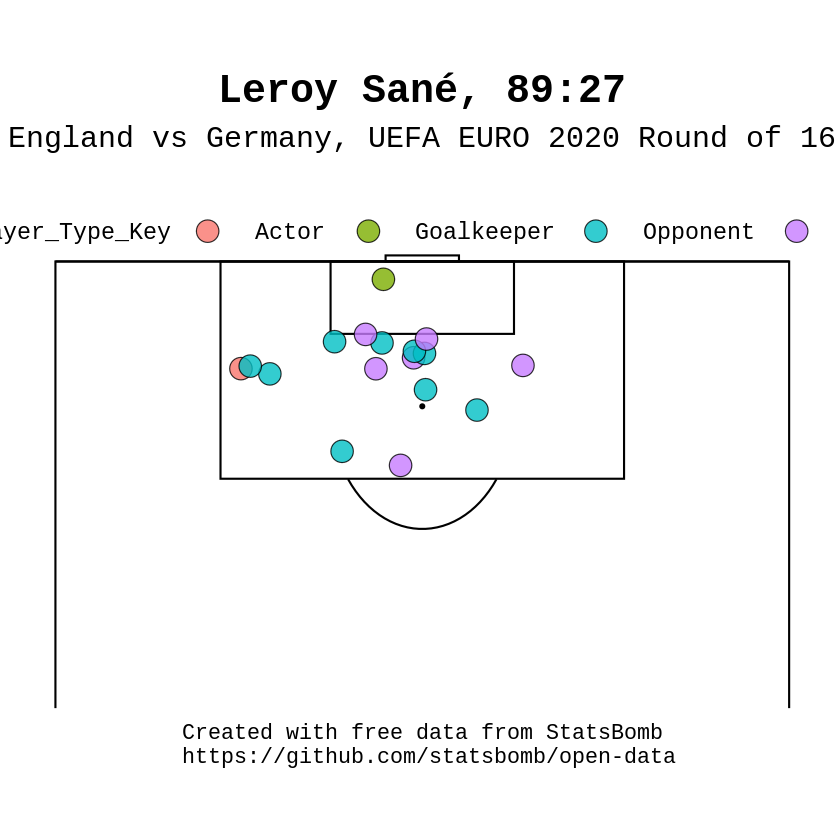

In [16]:
ggplot() +
annotate("rect",xmin = 0, xmax = 120, ymin = 0, ymax = 80, fill = NA, colour = "black", size = 0.6) +
annotate("rect",xmin = 0, xmax = 60, ymin = 0, ymax = 80, fill = NA, colour = "black", size = 0.6) +
annotate("rect",xmin = 18, xmax = 0, ymin = 18, ymax = 62, fill = NA, colour = "black", size = 0.6) +
annotate("rect",xmin = 102, xmax = 120, ymin = 18, ymax = 62, fill = NA, colour = "black", size = 0.6) +
annotate("rect",xmin = 0, xmax = 6, ymin = 30, ymax = 50, fill = NA, colour = "black", size = 0.6) +
annotate("rect",xmin = 120, xmax = 114, ymin = 30, ymax = 50, fill = NA, colour = "black", size = 0.6) +
annotate("rect",xmin = 120, xmax = 120.5, ymin =36, ymax = 44, fill = NA, colour = "black", size = 0.6) +
annotate("rect",xmin = 0, xmax = -0.5, ymin =36, ymax = 44, fill = NA, colour = "black", size = 0.6) +
annotate("segment", x = 60, xend = 60, y = -0.5, yend = 80.5, colour = "black", size = 0.6)+
annotate("segment", x = 0, xend = 0, y = 0, yend = 80, colour = "black", size = 0.6)+
annotate("segment", x = 120, xend = 120, y = 0, yend = 80, colour = "black", size = 0.6)+
theme(rect = element_blank(),
line = element_blank()) +
# add penalty spot right
annotate("point", x = 108 , y = 40, colour = "black", size = 1.05) +
annotate("path", colour = "black", size = 0.6,
x=60+10*cos(seq(0,2*pi,length.out=2000)),
y=40+10*sin(seq(0,2*pi,length.out=2000)))+
# add centre spot
annotate("point", x = 60 , y = 40, colour = "black", size = 1.05) +
annotate("path", x=12+10*cos(seq(-0.3*pi,0.3*pi,length.out=30)), size = 0.6,
y=40+10*sin(seq(-0.3*pi,0.3*pi,length.out=30)), col="black") +
annotate("path", x=107.84-10*cos(seq(-0.3*pi,0.3*pi,length.out=30)), size = 0.6,
y=40-10*sin(seq(-0.3*pi,0.3*pi,length.out=30)), col="black") +
geom_point(data = chart, aes(x = ff_location.x, y = ff_location.y, fill=Player_Type_Key),
size = 6, alpha = 0.8, shape=21) +
theme(axis.text.x=element_blank(),
axis.title.x = element_blank(),
axis.title.y = element_blank(),
plot.caption=element_text(size=13,family="Source Sans Pro", hjust=0.5, vjust=0.5),
plot.subtitle = element_text(size = 18, family="Source Sans Pro", hjust = 0.5),
axis.text.y=element_blank(),
legend.position = "top",
legend.title=element_text(size=14,family="Source Sans Pro"),
legend.text=element_text(size=14,family="Source Sans Pro"),
legend.margin = margin(c(20, 10, -65, 50)),
legend.key.size = unit(1.5, "cm"),
plot.title = element_text(margin = margin(r = 10, b = 10), face="bold",size = 24, family="Source Sans Pro", colour = "black", hjust = 0.5),
legend.direction = "horizontal",
axis.ticks=element_blank(),
aspect.ratio = c(65/100),
plot.background = element_rect(fill = "white"),
strip.text.x = element_text(size=13,family="Source Sans Pro")) +
labs(title = "Leroy Sané, 89:27", subtitle = "England vs Germany, UEFA EURO 2020 Round of 16", caption = "Created with free data from StatsBomb\n https://github.com/statsbomb/open-data") +
coord_flip(xlim = c(85, 125))

This code is intended to be a starting point to get you going with your analysis. Mess around with the event types, filters, and plots to create your own vis — the possibilities of what can be discovered with this data are significant, and we hope you have fun experimenting and discovering them.

# "Working-with-R"
https://statsbomb.com/wp-content/uploads/2022/08/Working-with-R.pdf

Goals and Shots

In [23]:
shots_goals = events %>%
group_by(team.name) %>% #1
summarise(shots = sum(type.name=="Shot", na.rm = TRUE),
goals = sum(shot.outcome.name=="Goal", na.rm = TRUE)) #2
shots_goals

team.name,shots,goals
<chr>,<int>,<int>
Austria,53,5
Belgium,48,8
Croatia,41,6
Czech Republic,56,6
Denmark,92,12
England,70,12
Finland,19,1
France,63,10
Germany,50,4


Per game basis

In [24]:
shots_goals = events %>%
group_by(team.name) %>%
summarise(shots = sum(type.name=="Shot", na.rm = TRUE)/n_distinct(match_id),
goals = sum(shot.outcome.name=="Goal", na.rm = TRUE)/n_distinct(match_id))
shots_goals

team.name,shots,goals
<chr>,<dbl>,<dbl>
Austria,13.250000,1.2500000
Belgium,9.600000,1.6000000
Croatia,10.250000,1.5000000
Czech Republic,11.200000,1.2000000
Denmark,15.333333,2.0000000
England,10.000000,1.7142857
Finland,6.333333,0.3333333
France,15.750000,2.5000000
Germany,12.500000,1.0000000


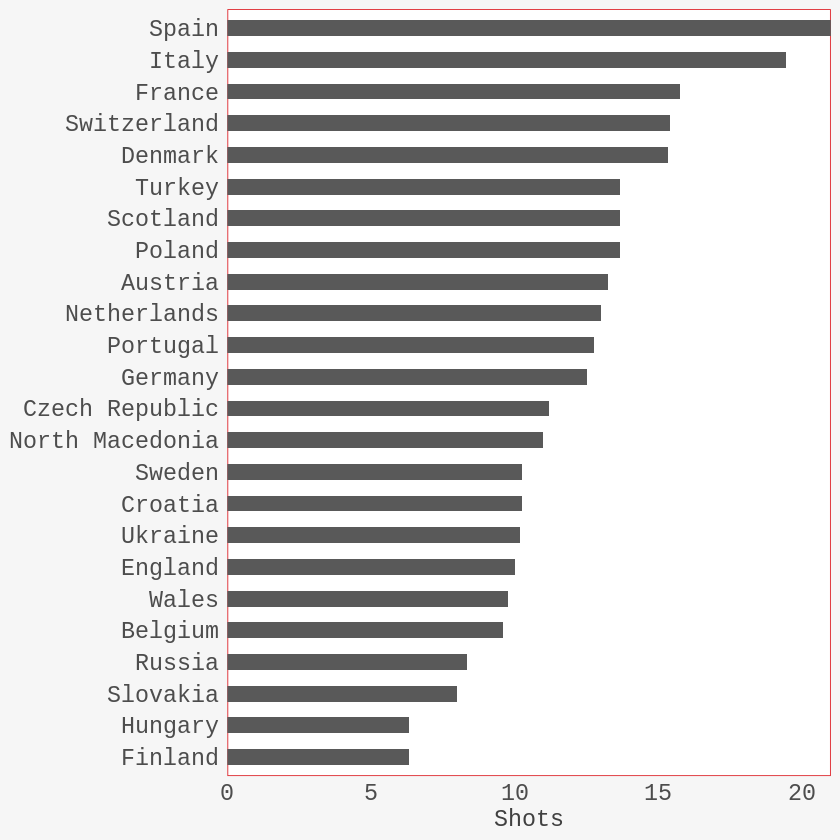

In [25]:
library(ggplot2)
ggplot(data = shots_goals,
aes(x = reorder(team.name, shots), y = shots)) + #1
geom_bar(stat = "identity", width = 0.5) + #2
labs(y="Shots") + #3
theme(axis.title.y = element_blank()) + #4
scale_y_continuous( expand = c(0,0)) + #5
coord_flip() + #6
theme_SB() #

Player shots per 90

This same process can of course be applied to all
sorts of events with StatsBomb Data. Certain types of
passes, defensive actions and so on.

In [28]:
player_shots = events %>%
group_by(player.name, player.id) %>%
summarise(shots = sum(type.name=="Shot", na.rm = TRUE)) #1
player_minutes = get.minutesplayed(events) #2
player_minutes = player_minutes %>%
group_by(player.id) %>%
summarise(minutes = sum(MinutesPlayed)) #3
player_shots = left_join(player_shots, player_minutes) #4
player_shots = player_shots %>% mutate(nineties = minutes/90) #5
player_shots = player_shots %>% mutate(shots_per90 = shots/nineties) #6
player_shots

`summarise()` has grouped output by 'player.name'. You can override using the
`.groups` argument.
Joining, by = "id"
Joining, by = "match_id"
Joining, by = "player.id"


player.name,player.id,shots,minutes,nineties,shots_per90
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Aaron Ramsey,3517,7,370.68362,4.1187069,1.6995626
Adam Hložek,28239,1,93.68257,1.0409174,0.9606910
Ádám Nagy,7162,0,284.80097,3.1644552,0.0000000
Ádám Szalai,8407,5,204.68710,2.2743011,2.1984776
Adama Traoré Diarra,11333,0,18.06037,0.2006707,0.0000000
Admir Mehmedi,8219,3,55.71832,0.6190924,4.8458033
Adrien Rabiot,3026,3,337.67920,3.7519911,0.7995755
Albin Ekdal,5624,2,414.60717,4.6067463,0.4341459
Aleksandar Dragović,3969,1,357.37038,3.9707820,0.2518396


In [29]:
devtools::install_github("FCrSTATS/SBpitch")


* checking for file ‘/tmp/Rtmpan8agW/remotes3b61863d5e/FCrSTATS-SBpitch-9dcb4f8/DESCRIPTION’ ... OK
* preparing ‘SBpitch’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘SBpitch_1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Plotting Passes

Weʼre going to plot Fran Kirbyʼs completed passes into the box for the 2020/21 FA Womenʼs Super League
season. Plotting all of her passes would get messy of course, so this is a clearer subset. Make sure youʼve used
the functions previously discussed to pull that data.


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



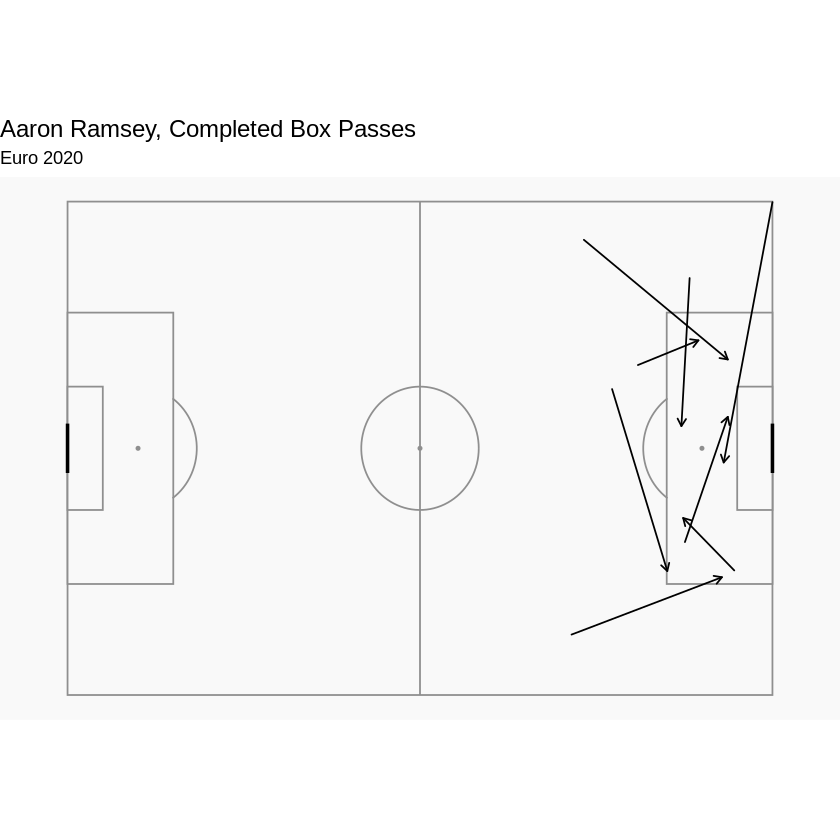

In [33]:
library(SBpitch)
passes = events %>%
 filter(type.name=="Pass" & is.na(pass.outcome.name) &
player.id==3517) %>% #1
 filter(pass.end_location.x>=102 & pass.end_location.y<=62 &
pass.end_location.y>=18) #2
create_Pitch() +
 geom_segment(data = passes, aes(x = location.x, y = location.y,
 xend = pass.end_location.x, yend = pass.end_location.y),
 lineend = "round", size = 0.5, colour = "#000000", arrow =
arrow(length = unit(0.07, "inches"), ends = "last", type = "open")) + #3
 labs(title = "Aaron Ramsey, Completed Box Passes", subtitle = "Euro 2020") + #4
scale_y_reverse() + #5
coord_fixed(ratio = 105/100) #6


xG Assisted, Joining, and xG+xGA

xG assisted does not exist in our data initially. However, given that xGA
is the xG value of a shot that a key pass/assist created, and that xG
values do exist in our data, we can create xGA quite easily via joining.


In [35]:
xGA = events %>%
filter(type.name=="Shot") %>% #1
select(shot.key_pass_id, xGA = shot.statsbomb_xg) #2


In [37]:
shot_assists = left_join(events, xGA, by = c("id" = "shot.key_pass_id")) %>% #3
select(team.name, player.name, player.id, type.name, pass.shot_assist,
pass.goal_assist, xGA ) %>% #4
filter(pass.shot_assist==TRUE | pass.goal_assist==TRUE) #5

In [38]:
shot_assists

team.name,player.name,player.id,type.name,pass.shot_assist,pass.goal_assist,xGA
<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>,<dbl>
Italy,Domenico Berardi,7131,Pass,TRUE,NA,0.05259243
Italy,Nicolò Barella,8181,Pass,TRUE,NA,0.01755674
Italy,Domenico Berardi,7131,Pass,TRUE,NA,0.10979958
Italy,Lorenzo Insigne,7037,Pass,TRUE,NA,0.06608326
Italy,Lorenzo Insigne,7037,Pass,TRUE,NA,0.04990327
Italy,Lorenzo Insigne,7037,Pass,TRUE,NA,0.04227080
Italy,Domenico Berardi,7131,Pass,TRUE,NA,0.02493216
Italy,Giorgio Chiellini,6954,Pass,TRUE,NA,0.03219186
Italy,Jorge Luiz Frello Filho,7024,Pass,TRUE,NA,0.02854860


 xG+xGA per90 chart

In [39]:
player_xGA = shot_assists %>%
group_by(player.name, player.id, team.name) %>%
summarise(xGA = sum(xGA, na.rm = TRUE)) #1


`summarise()` has grouped output by 'player.name', 'player.id'. You can
override using the `.groups` argument.


In [40]:
player_xG = events %>%
filter(type.name=="Shot") %>%
filter(shot.type.name!="Penalty" | is.na(shot.type.name)) %>%
group_by(player.name, player.id, team.name) %>%
summarise(xG = sum(shot.statsbomb_xg, na.rm = TRUE)) %>%
left_join(player_xGA) %>%
mutate(xG_xGA = sum(xG+xGA, na.rm =TRUE) ) #2

`summarise()` has grouped output by 'player.name', 'player.id'. You can
override using the `.groups` argument.
Joining, by = c("player.name", "player.id", "team.name")


In [41]:
player_minutes = get.minutesplayed(events)

Joining, by = "id"
Joining, by = "match_id"


In [42]:
player_minutes = player_minutes %>%
group_by(player.id) %>%
summarise(minutes = sum(MinutesPlayed)) #

In [43]:
player_xG_xGA = left_join(player_xG, player_minutes) %>%
mutate(nineties = minutes/90,
xG_90 = round(xG/nineties, 2),
xGA_90 = round(xGA/nineties,2),
xG_xGA90 = round(xG_xGA/nineties,2) ) #4

Joining, by = "player.id"


In [44]:
chart = player_xG_xGA %>%
ungroup() %>%
filter(minutes>=600) %>%
top_n(n = 15, w = xG_xGA90) #5

In [45]:
chart<-chart %>%
select(1, 9:10)%>%
pivot_longer(-player.name, names_to = "variable", values_to = "value") %>%
filter(variable=="xG_90" | variable=="xGA_90") #6


In [46]:
chart

player.name,variable,value
<chr>,<chr>,<dbl>
Aymeric Laporte,xG_90,0.03
Aymeric Laporte,xGA_90,0.04
Giovanni Di Lorenzo,xG_90,0.08
Giovanni Di Lorenzo,xGA_90,0.04
Harry Kane,xG_90,0.38
Harry Kane,xGA_90,0.07
Joakim Mæhle,xG_90,0.18
Joakim Mæhle,xGA_90,0.09
John Stones,xG_90,0.05


 plot it

Warning message:
“Removed 1 rows containing missing values (position_stack).”


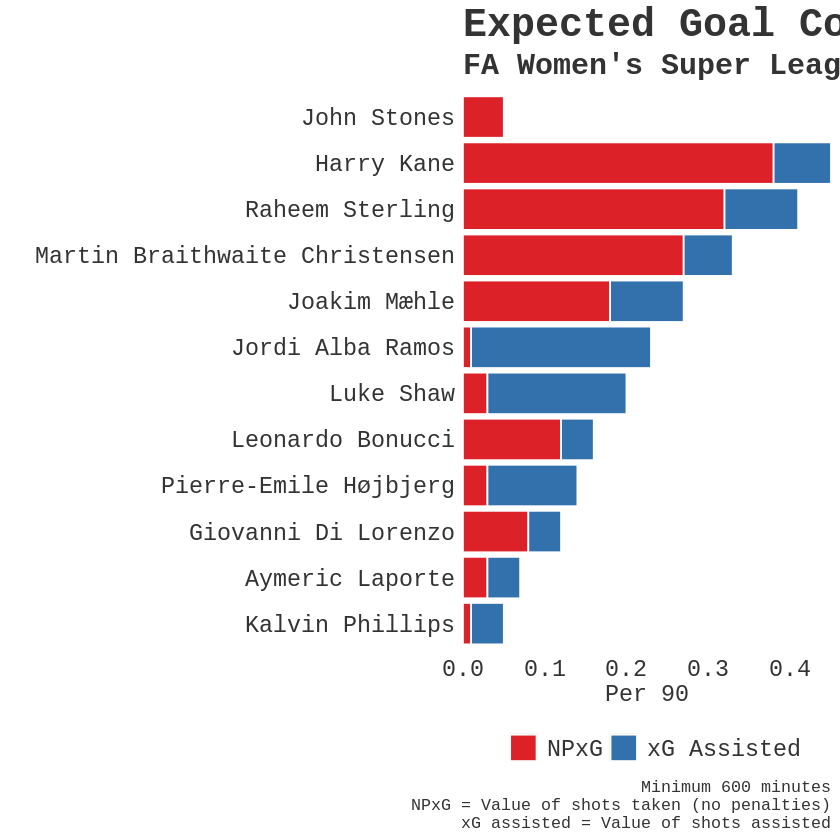

In [47]:
ggplot(chart, aes(x =reorder(player.name, value), y = value, fill=fct_rev(variable))) + #1
 geom_bar(stat="identity", colour="white")+
 labs(title = "Expected Goal Contribution", subtitle = "Euro 2020",
 x="", y="Per 90", caption ="Minimum 600 minutes\nNPxG = Value of shots taken (no penalties)\nxG assisted = Value of shots assisted")+
 theme(axis.text.y = element_text(size=14, color="#333333", family="Source Sans Pro"),
 axis.title = element_text(size=14, color="#333333", family="Source Sans Pro"),
 axis.text.x = element_text(size=14, color="#333333", family="Source Sans Pro"),
 axis.ticks = element_blank(),
 panel.background = element_rect(fill = "white", colour = "white"),
 plot.background = element_rect(fill = "white", colour ="white"),
 panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
 plot.title=element_text(size=24, color="#333333", family="Source Sans Pro" , face="bold"),
 plot.subtitle=element_text(size=18, color="#333333", family="Source Sans Pro", face="bold"),
 plot.caption=element_text(color="#333333", family="Source Sans Pro", size =10),
 text=element_text(family="Source Sans Pro"),
 legend.title=element_blank(),
 legend.text = element_text(size=14, color="#333333", family="Source Sans Pro"),
 legend.position = "bottom") + #2
 scale_fill_manual(values=c("#3371AC", "#DC2228"), labels = c( "xG Assisted","NPxG")) + #3
 scale_y_continuous(expand = c(0, 0), limits= c(0,max(chart$value) + 0.3)) + #4
 coord_flip()+ #5
 guides(fill = guide_legend(reverse = TRUE)) #6


Heatmaps

In [48]:
heatmap = events %>%mutate(location.x = ifelse(location.x>120, 120, location.x),
location.y = ifelse(location.y>80, 80, location.y),
location.x = ifelse(location.x<0, 0, location.x),
location.y = ifelse(location.y<0, 0, location.y)) #1

heatmap$xbin <- cut(heatmap$location.x, breaks = seq(from=0, to=120, by = 20),include.lowest=TRUE )
heatmap$ybin <- cut(heatmap$location.y, breaks = seq(from=0, to=80, by = 20),include.lowest=TRUE) #2


In [49]:
heatmap = heatmap%>%
filter(type.name=="Pressure" | duel.type.name=="Tackle" |
type.name=="Foul Committed" | type.name=="Interception" |
type.name=="Block" ) %>%
group_by(team.name) %>%
mutate(total_DA = n()) %>%
group_by(team.name, xbin, ybin) %>%
summarise(total_DA = max(total_DA),
bin_DA = n(),
bin_pct = bin_DA/total_DA,
location.x = median(location.x),
location.y = median(location.y)) %>%
group_by(xbin, ybin) %>%
mutate(league_ave = mean(bin_pct)) %>%
group_by(team.name, xbin, ybin) %>%
mutate(diff_vs_ave = bin_pct - league_ave) #3


`summarise()` has grouped output by 'team.name', 'xbin'. You can override using
the `.groups` argument.


In [50]:
defensiveactivitycolors <- c("#dc2429", "#dc2329", "#df272d", "#df3238", "#e14348", "#e44d51",
"#e35256", "#e76266", "#e9777b", "#ec8589", "#ec898d", "#ef9195",
"#ef9ea1", "#f0a6a9", "#f2abae", "#f4b9bc", "#f8d1d2", "#f9e0e2",
"#f7e1e3", "#f5e2e4", "#d4d5d8", "#d1d3d8", "#cdd2d6", "#c8cdd3", "#c0c7cd",
"#b9c0c8", "#b5bcc3", "#909ba5", "#8f9aa5", "#818c98", "#798590",
"#697785", "#526173", "#435367", "#3a4b60", "#2e4257", "#1d3048",
"#11263e", "#11273e", "#0d233a", "#020c16") #1

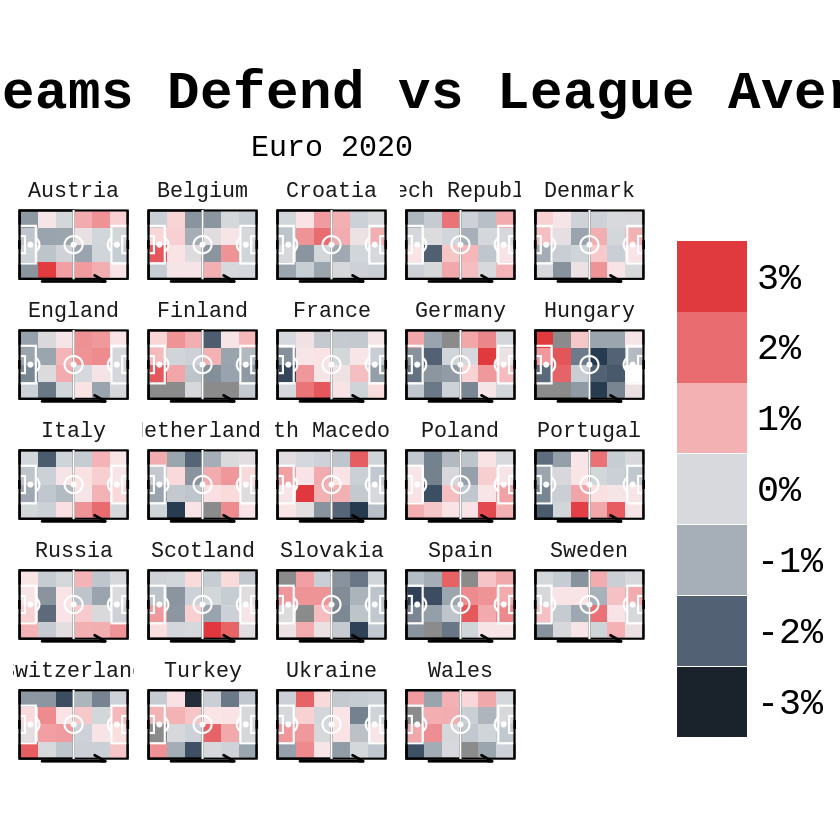

In [53]:
ggplot(data= heatmap, aes(x = location.x, y = location.y, fill = diff_vs_ave, group =diff_vs_ave)) +
 geom_bin2d(binwidth = c(20, 20), position = "identity", alpha = 0.9) + #2
 annotate("rect",xmin = 0, xmax = 120, ymin = 0, ymax = 80, fill = NA, colour = "black", size = 0.6) +
 annotate("rect",xmin = 0, xmax = 60, ymin = 0, ymax = 80, fill = NA, colour = "black", size = 0.6) +
 annotate("rect",xmin = 18, xmax = 0, ymin = 18, ymax = 62, fill = NA, colour = "white", size = 0.6) +
 annotate("rect",xmin = 102, xmax = 120, ymin = 18, ymax = 62, fill = NA, colour = "white", size = 0.6) +
 annotate("rect",xmin = 0, xmax = 6, ymin = 30, ymax = 50, fill = NA, colour = "white", size = 0.6) +
 annotate("rect",xmin = 120, xmax = 114, ymin = 30, ymax = 50, fill = NA, colour = "white", size = 0.6) +
 annotate("rect",xmin = 120, xmax = 120.5, ymin =36, ymax = 44, fill = NA, colour = "black", size = 0.6) +
 annotate("rect",xmin = 0, xmax = -0.5, ymin =36, ymax = 44, fill = NA, colour = "black", size = 0.6) +
 annotate("segment", x = 60, xend = 60, y = -0.5, yend = 80.5, colour = "white", size = 0.6)+
 annotate("segment", x = 0, xend = 0, y = 0, yend = 80, colour = "black", size = 0.6)+
 annotate("segment", x = 120, xend = 120, y = 0, yend = 80, colour = "black", size = 0.6)+
 theme(rect = element_blank(),
 line = element_blank()) +
 annotate("point", x = 12 , y = 40, colour = "white", size = 1.05) +
 annotate("point", x = 108 , y = 40, colour = "white", size = 1.05) +
 annotate("path", colour = "white", size = 0.6,
 x=60+10*cos(seq(0,2*pi,length.out=2000)),
 y=40+10*sin(seq(0,2*pi,length.out=2000)))+
 annotate("point", x = 60 , y = 40, colour = "white", size = 1.05) +
 annotate("path", x=12+10*cos(seq(-0.3*pi,0.3*pi,length.out=30)), size = 0.6,
 y=40+10*sin(seq(-0.3*pi,0.3*pi,length.out=30)), col="white") +
 annotate("path", x=108-10*cos(seq(-0.3*pi,0.3*pi,length.out=30)), size = 0.6,
 y=40-10*sin(seq(-0.3*pi,0.3*pi,length.out=30)), col="white") + #3
theme(axis.text.x=element_blank(),
 axis.title.x = element_blank(),
 axis.title.y = element_blank(),
 plot.caption=element_text(size=13,family="Source Sans Pro", hjust=0.5, vjust=0.5),
 plot.subtitle = element_text(size = 18, family="Source Sans Pro", hjust = 0.5),
 axis.text.y=element_blank(),
 legend.title = element_blank(),
 legend.text=element_text(size=22,family="Source Sans Pro"),
 legend.key.size = unit(1.5, "cm"),
 plot.title = element_text(margin = margin(r = 10, b = 10), face="bold",size = 32.5,
family="Source Sans Pro", colour = "black", hjust = 0.5),
 legend.direction = "vertical",
 axis.ticks=element_blank(),
 plot.background = element_rect(fill = "white"),
 strip.text.x = element_text(size=13,family="Source Sans Pro")) + #4
 scale_y_reverse() + #5
 scale_fill_gradientn(colours = defensiveactivitycolors, trans = "reverse", labels =
scales::percent_format(accuracy = 1), limits = c(0.03, -0.03)) + #6
 labs(title = "Where Do Teams Defend vs League Average?", subtitle = "Euro 2020") + #7
 coord_fixed(ratio = 95/100) + #8
 annotation_custom(grob = linesGrob(arrow=arrow(type="open", ends="last",
 length=unit(2.55,"mm")), gp=gpar(col="black", fill=NA, lwd=2.2)),
 xmin=25, xmax = 95, ymin = -83, ymax = -83) + #9
 facet_wrap(~team.name)+ #10
 guides(fill = guide_legend(reverse = TRUE)) #11


Shot Maps

In [57]:
shots = events %>%
 filter(type.name=="Shot" & (shot.type.name!="Penalty" | is.na(shot.type.name)) & player.name=="Harry Kane") #1
shotmapxgcolors <- c("#192780", "#2a5d9f", "#40a7d0", "#87cdcf", "#e7f8e6", "#f4ef95", "#FDE960", "#FCDC5F",
 "#F5B94D", "#F0983E", "#ED8A37", "#E66424", "#D54F1B", "#DC2608", "#BF0000", "#7F0000", "#5F0000") #2

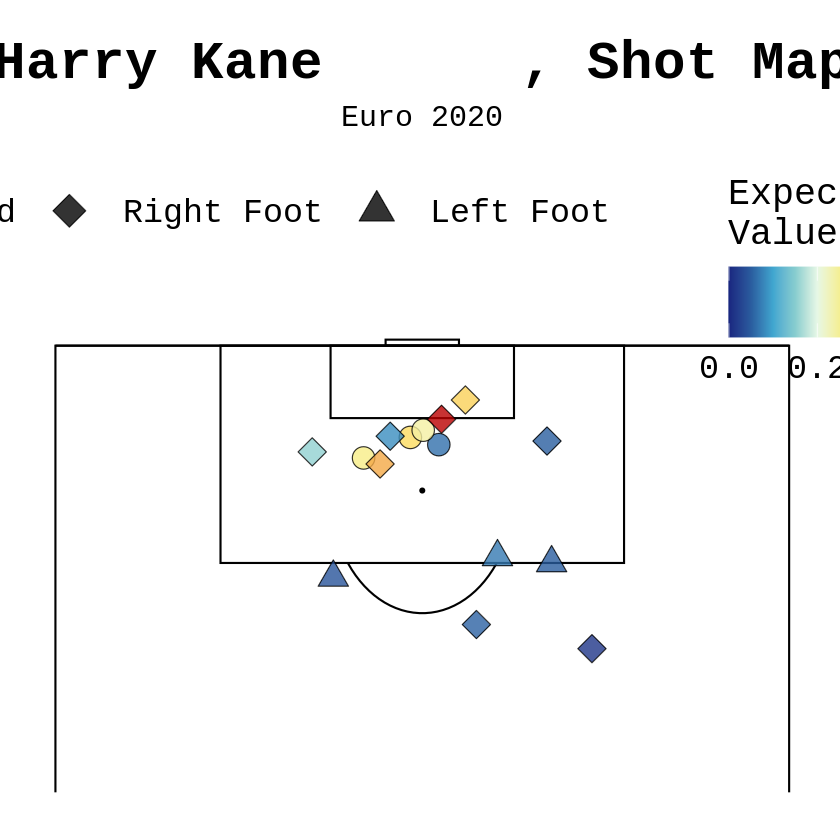

In [58]:
ggplot() +
 annotate("rect",xmin = 0, xmax = 120, ymin = 0, ymax = 80, fill = NA, colour = "black", size = 0.6) +
 annotate("rect",xmin = 0, xmax = 60, ymin = 0, ymax = 80, fill = NA, colour = "black", size = 0.6) +
 annotate("rect",xmin = 18, xmax = 0, ymin = 18, ymax = 62, fill = NA, colour = "black", size = 0.6) +
 annotate("rect",xmin = 102, xmax = 120, ymin = 18, ymax = 62, fill = NA, colour = "black", size = 0.6) +
 annotate("rect",xmin = 0, xmax = 6, ymin = 30, ymax = 50, fill = NA, colour = "black", size = 0.6) +
 annotate("rect",xmin = 120, xmax = 114, ymin = 30, ymax = 50, fill = NA, colour = "black", size = 0.6) +
 annotate("rect",xmin = 120, xmax = 120.5, ymin =36, ymax = 44, fill = NA, colour = "black", size = 0.6) +
 annotate("rect",xmin = 0, xmax = -0.5, ymin =36, ymax = 44, fill = NA, colour = "black", size = 0.6) +
 annotate("segment", x = 60, xend = 60, y = -0.5, yend = 80.5, colour = "black", size = 0.6)+
 annotate("segment", x = 0, xend = 0, y = 0, yend = 80, colour = "black", size = 0.6)+
 annotate("segment", x = 120, xend = 120, y = 0, yend = 80, colour = "black", size = 0.6)+
 theme(rect = element_blank(),
 line = element_blank()) +
 # add penalty spot right
 annotate("point", x = 108 , y = 40, colour = "black", size = 1.05) +
 annotate("path", colour = "black", size = 0.6,
 x=60+10*cos(seq(0,2*pi,length.out=2000)),
 y=40+10*sin(seq(0,2*pi,length.out=2000)))+
 # add centre spot
 annotate("point", x = 60 , y = 40, colour = "black", size = 1.05) +
 annotate("path", x=12+10*cos(seq(-0.3*pi,0.3*pi,length.out=30)), size = 0.6,
 y=40+10*sin(seq(-0.3*pi,0.3*pi,length.out=30)), col="black") +
 annotate("path", x=107.84-10*cos(seq(-0.3*pi,0.3*pi,length.out=30)), size = 0.6,
 y=40-10*sin(seq(-0.3*pi,0.3*pi,length.out=30)), col="black") +
 geom_point(data = shots, aes(x = location.x, y = location.y, fill = shot.statsbomb_xg, shape = shot.body_part.name),
 size = 6, alpha = 0.8) + #3
  theme(axis.text.x=element_blank(),
 axis.title.x = element_blank(),
 axis.title.y = element_blank(),
 plot.caption=element_text(size=13,family="Source Sans Pro", hjust=0.5, vjust=0.5),
 plot.subtitle = element_text(size = 18, family="Source Sans Pro", hjust = 0.5),
 axis.text.y=element_blank(),
 legend.position = "top",
 legend.title=element_text(size=22,family="Source Sans Pro"),
 legend.text=element_text(size=20,family="Source Sans Pro"),
 legend.margin = margin(c(20, 10, -85, 50)),
 legend.key.size = unit(1.5, "cm"),
 plot.title = element_text(margin = margin(r = 10, b = 10), face="bold",size = 32.5, family="Source Sans
Pro", colour = "black", hjust = 0.5),
 legend.direction = "horizontal",
 axis.ticks=element_blank(),
 aspect.ratio = c(65/100),
 plot.background = element_rect(fill = "white"),
 strip.text.x = element_text(size=13,family="Source Sans Pro")) +
 labs(title = "Harry Kane	, Shot Map", subtitle = "Euro 2020") + #4
 scale_fill_gradientn(colours = shotmapxgcolors, limit = c(0,0.8), oob=scales::squish, name = "Expected Goals
Value") + #5
scale_shape_manual(values = c("Head" = 21, "Right Foot" = 23, "Left Foot" = 24), name ="") + #6
 guides(fill = guide_colourbar(title.position = "top"),
 shape = guide_legend(override.aes = list(size = 7, fill = "black"))) + #7
 coord_flip(xlim = c(85, 125)) #8
